# Data Analysis of Netflix Original Films and IMDB_Scores

### Description: 

Study aims to be beginner friendly and give as much as possible explanation for each step on the way for beginners. The dataset has top 584 Netflix original films on the different genre. Each films has language, release time, runtime and IMDB Score.

- Exploratory Data Analysis
- The language were the long-running films created according to the dataset and visualization.
- Finding the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020 and visualization.
- The genre has the highest IMDB rating among movies made in English
- The average 'runtime' of movies shot in 'Hindi'
- Value Counts of the 'Genre' Column have and what are those categories and visualization.
- The 3 most used languages in the movies in the data set.
- The correlation between IMDB score and 'Runtime' and visualization.
- The top 10 'Genre's with the highest IMDB Ratings and visualization.
- The top 10 movies with the highest 'runtime' and visualization.
- The year was the most movies released and visualization.
- The language movies have the lowest average IMDB rating and visualization.
- The year has the greatest total runtime
- The most used "Genre" of each language
- Outlier Analysis

In [1]:
# Importing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
# ==========================
# Display Settings
# ==========================

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# ==========================
# Loading Dataset
# ==========================
df = pd.read_csv("../input/netflix-original-films-imdb-scores/NetflixOriginals.csv", encoding='ISO-8859-1')

In [4]:
# ==========================
# Exploratory Data Analysis
# ==========================

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### MissingValues #######################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)


check_df(df)


def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


grab_col_names(df)
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None
##################### Head #####################
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   


                      Language  Runtime
0                 English/Akan  136.000
1         Khmer/English/French  136.000
2                      Marathi  121.667
3               English/Korean  121.000
4              Spanish/Catalan  116.000
5                       Korean  115.833
6                        Hindi  115.788
7               English/Arabic  114.000
8                   Indonesian  103.778
9                      Turkish  101.800
10                       Malay  101.000
11                       Tamil  101.000
12                        Thai  101.000
13                       Dutch   99.667
14                      German   99.600
15                    Filipino   99.500
16                    Japanese   99.333
17                      Polish   98.667
18                     Italian   98.357
19             Spanish/English   96.000
20                     Spanish   93.387
21                      French   92.700
22                     English   91.818
23                  Portuguese   91.250


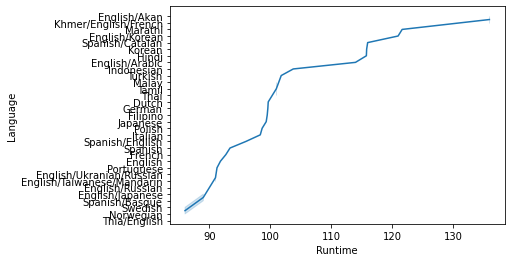

In [5]:
# The language were the long-running films created according to the dataset and visualization.

df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)[0:1]
langbyruntime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
print(langbyruntime)

sns.lineplot(y=langbyruntime["Language"], x=langbyruntime.loc[(langbyruntime["Runtime"] >= 86)]["Runtime"])
plt.show()

In [6]:
# Finding the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020 and visualization.


df["Date"] = pd.to_datetime(df.Premiere)

df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()

docum = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()
docum["Title"].value_counts()


print(df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head())

fig = px.bar(data_frame=docum, x=docum.Title, y=docum["IMDB Score"], labels={"y":"IMDB Score", "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

                                 Title        Genre            Premiere  \
0                      Enter the Anime  Documentary      August 5, 2019   
15                      After the Raid  Documentary   December 19, 2019   
20   Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019   
30                         After Maria  Documentary        May 24, 2019   
111               Ghosts of Sugar Land  Documentary    October 16. 2019   

     Runtime  IMDB Score          Language       Date  
0         58       2.500  English/Japanese 2019-08-05  
15        25       4.300           Spanish 2019-12-19  
20        64       4.400           English 2019-09-13  
30        37       4.600   English/Spanish 2019-05-24  
111       21       5.500           English 2019-10-16  


In [7]:
# The genre has the highest IMDB rating among movies made in English

df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English,2020-10-04


In [8]:
# The average 'runtime' of movies shot in 'Hindi'

df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})


Runtime   115.788
dtype: float64

In [9]:
# Value Counts of the 'Genre' Column have and what are those categories and visualization.

df["Genre"].unique()
df["Genre"].value_counts()
print(df["Genre"].value_counts())
topgenre = df["Genre"].value_counts().nlargest(30)

fig = px.bar(data_frame=topgenre, x=topgenre.index, y=topgenre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama                    

In [10]:
# The 3 most used languages in the movies in the data set.


df["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [11]:

# The top 10 movies with the highest 'runtime' and visualization.

df.sort_values(by="IMDB Score", ascending=False)[0:10]

top_10_ratings = df.sort_values(by="IMDB Score", ascending=False)[0:10]
fig = px.scatter(top_10_ratings, y= 'Title', x='IMDB Score', color='Genre', 
                 title = "Top 10 High Rated Programs")

fig.show()

            IMDB Score  Runtime
IMDB Score       1.000   -0.041
Runtime         -0.041    1.000


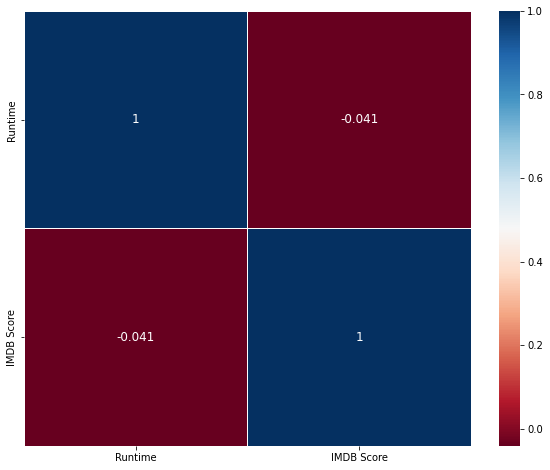

There is no high correlation between Runtime and IMDB Scores


In [12]:
# The correlation between IMDB score and 'Runtime' and visualization.

def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)

print(df[["IMDB Score", "Runtime"]].corr())
correlation_matrix(df, num_cols)
print("There is no high correlation between Runtime and IMDB Scores")

                                      IMDB Score
Genre                                           
Documentary                                9.000
One-man show                               8.500
Concert Film                               8.400
Animation/Christmas/Comedy/Adventure       8.200
Drama                                      7.900
Animation / Short                          7.800
Crime drama                                7.800
Musical / Short                            7.700
Making-of                                  7.700
War drama                                  7.700


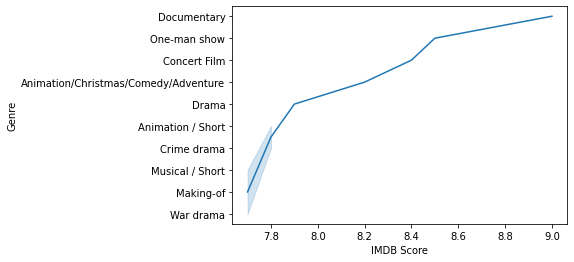

In [13]:
# The top 10 'Genre's with the highest IMDB Ratings and visualization.


df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genrescore_on = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[
                0:10].reset_index()

print (df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10])
sns.lineplot(y=genrescore_on["Genre"], x=genrescore_on["IMDB Score"])
plt.show()


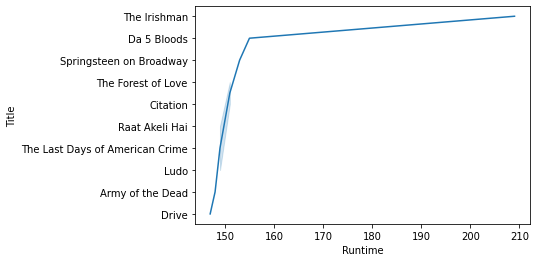

In [14]:
# The top 10 movies with the highest 'runtime' and visualization.

df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]

Runtime_on = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=Runtime_on["Title"], x=Runtime_on["Runtime"])
plt.show()

In [15]:
# The year was the most movies released and visualization.


df['Year'] = df['Date'].dt.year
df['Year'].value_counts(sort=True)[0:1]
year = df['Year'].value_counts(sort=True)


fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

In [16]:
# The language movies have the lowest average IMDB rating and visualization.


df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[0:1]

df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)
lowest = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)

fig = px.bar(data_frame=lowest, x=lowest.index, y=lowest.values, 
             labels={'y':'Average Rating Score', 'x':'Language'})

fig.show()

In [17]:
# The year has the greatest total runtime

df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]

,Runtime
Year,
2020,17384


In [18]:
# The most used "Genre" of each language

df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [19]:
# Outlier Analysis
# 15. Veri setinde outlier veri var mıdır? Açıklayınız.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))

print("conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.")

Runtime False
IMDB Score False
Date False
Year False
conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.
